In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [5]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [6]:
noise = np.random.randn(len(x_data))

In [7]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

Y = mx+b

b= 5

In [9]:
y_true = (0.5 *x_data) + 5 + noise

In [12]:
x_df = pd.DataFrame(data = x_data, columns=['X Data'])
y_df = pd.DataFrame(data = y_true, columns= ['Y'])
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [13]:
my_data = pd.concat([x_df, y_df], axis=1)

In [15]:
my_data.head()

,X Data,Y
0,0.00000,4.671539
1,0.00001,3.457835
2,0.00002,5.397206
3,0.00003,6.286153
4,0.00004,4.488068


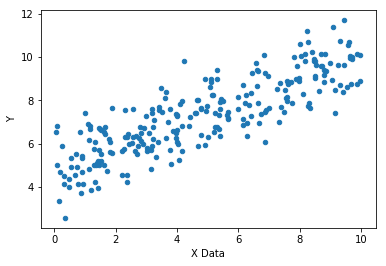

In [25]:
my_data.sample(n=250).plot.scatter(x= 'X Data', y='Y' )

In [26]:
batch_size = 8
#Initialize randomly the two variables of our linear model
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [27]:
xph = tf.placeholder(tf.float32, [batch_size])

In [28]:
yph = tf.placeholder(tf.float32, [batch_size])

In [29]:
# Here you can see the parameters of the model we just want to tune
y_model = m *xph + b

In [30]:
# We need a loss function to optimize
error = tf.reduce_sum(tf.square(yph-y_model))

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [32]:
init = tf.global_variables_initializer()

In [44]:
np.random.randint(5, size= 8)

array([3, 0, 4, 3, 3, 3, 2, 2])

In [52]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        #Random index to collect data from dataset
        rand_ind = np.random.randint(len(x_data), size= batch_size)
        feed={xph:x_data[rand_ind], yph:y_true[rand_ind] }
        sess.run(train, feed_dict = feed)
    
    model_m, model_b = sess.run([m,b])

In [53]:
model_m

0.43456954

In [54]:
model_b

4.9874167

In [55]:
y_hat = model_m*x_data + model_b

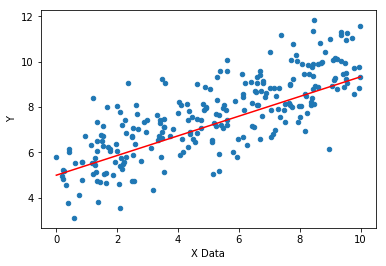

In [56]:
my_data.sample(n=250).plot.scatter(x= 'X Data', y='Y' )
plt.plot(x_data, y_hat,'r')